In [16]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [19]:
def read_json_to_df(path):
    with open(path, 'rt') as f:
        file = json.load(f)
    data = []
    metric_names = []
    is_init_metric_names = False
    for num_epochs in file.keys():
        for percent in file[num_epochs].keys():
            for learner in file[num_epochs][percent]:

                loss = file[num_epochs][percent][learner]['loss']
                metrics = file[num_epochs][percent][learner]['metrics']
                for i, (l, metric) in enumerate(zip(loss, metrics)):
                    metric_list = []
                    for m in metric:
                        if not is_init_metric_names:
                            metric_names.append(m['metric_alias'])
                        metric_list.append(m['value'])
                    row = [learner, num_epochs, percent, i, l] + metric_list
                    data.append(row)
                    is_init_metric_names = True
    return pd.DataFrame(data, columns=['learner', 'num_epochs', 'percent', 'epoch', 'loss'] + metric_names)

In [20]:
df = read_json_to_df('output/bert-base-uncased.json')

In [21]:
df

,learner,num_epochs,percent,epoch,loss,f1 weighted,f1 macro,f1 micro,accuracy
0,active,2,5,0,150.310054,0.723385,0.655686,0.743587,0.743587
1,active,2,5,1,51.033766,0.713126,0.638725,0.747304,0.747304
2,random,2,5,0,150.316525,0.719814,0.649817,0.740860,0.740860
3,random,2,5,1,70.592120,0.759103,0.699302,0.773206,0.773206


In [22]:
active = df[df['learner'] == 'active']

In [26]:
random = df[df['learner'] == 'random']

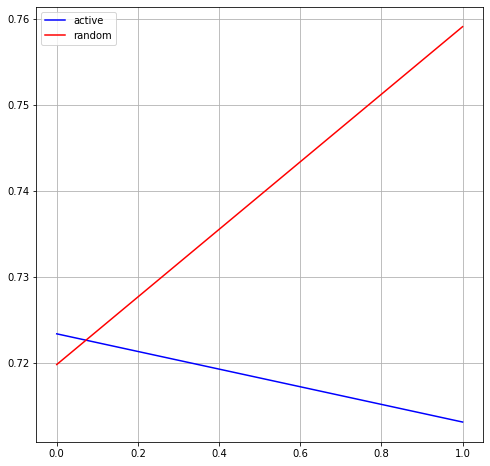

In [29]:
plt.figure(figsize=(8, 8))
plt.grid()
plt.plot(active['epoch'], active['f1 weighted'], label='active', color='b')
plt.plot(random['epoch'], random['f1 weighted'], label='random', color='r')
plt.legend()